In [1]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.datasets import mnist
from keras.models import Sequential
from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.layers import Activation, Dense
from keras import optimizers
from keras.layers import Dropout
import numpy as np
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score
from keras.layers import BatchNormalization

Using TensorFlow backend.


In [6]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [7]:
print(X_train.shape)
print(y_train.shape)

(60000, 28, 28)
(60000,)


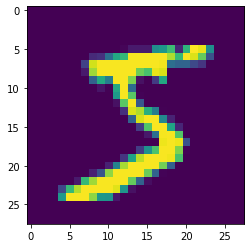

Label:  5


In [8]:
plt.imshow(X_train[0])    # show first number in the dataset
plt.show()
print('Label: ', y_train[0])

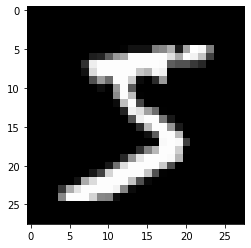

In [8]:
a=X_train[0]
plt.imshow(a, cmap='gray')

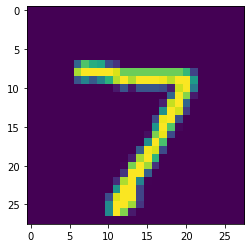

Label:  7


In [9]:
plt.imshow(X_test[0])    # show first number in the dataset
plt.show()
print('Label: ', y_test[0])

In [9]:
# reshaping X data: (n, 28, 28) => (n, 784)
#-1은 나머지 부분은 한개의 차원으로 만듬
X_train = X_train.reshape((X_train.shape[0], -1))
X_test = X_test.reshape((X_test.shape[0], -1))

In [10]:
print(X_train.shape)

(60000, 784)


In [11]:
a=np.array([[1,2,],[3,4],[5,6]])
print(a)
a=a.reshape(3,-1)
print(a)

[[1 2]
 [3 4]
 [5 6]]
[[1 2]
 [3 4]
 [5 6]]


In [12]:
# use only 33% of training data to expedite the training process
X_train, _ , y_train, _ = train_test_split(X_train, y_train, test_size = 0.67, random_state = 7)

print(X_train.shape)
print(y_train)

(19800, 784)
[6 9 2 ... 5 5 3]


In [13]:
# converting y data into categorical (one-hot encoding)
#1차원 vector를 2차원 행렬로 만들기
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)


In [14]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(19800, 784) (10000, 784) (19800, 10) (10000, 10)


### Basic MLP model

In [55]:
model = Sequential()

In [56]:
model.add(Dense(50, input_shape = (784, )))
model.add(Activation('sigmoid'))

model.add(Dense(50))
model.add(Activation('sigmoid'))

model.add(Dense(50))
model.add(Activation('sigmoid'))

model.add(Dense(50))
model.add(Activation('sigmoid'))

model.add(Dense(10))
model.add(Activation('softmax'))


In [57]:
sgd = optimizers.SGD(lr = 0.001) #Adam하면 금방 올라감,직접생성 lr 값을 조절

model.compile(optimizer = sgd, loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [65]:
#validation은 train 데이터를 나눔 0.3의 경우 70%만 가지고 학습을 하겠다.

history = model.fit(X_train, y_train, batch_size = 256, validation_split = 0.3, epochs = 200, verbose = 0)

In [63]:
print(history.history)

{'val_loss': [2.346234211295542, 2.3371978997381446], 'val_acc': [0.09949494952003562, 0.09949494952003562], 'loss': [2.3553728021756566, 2.3447444875174956], 'acc': [0.09783549783657296, 0.09783549783657296]}


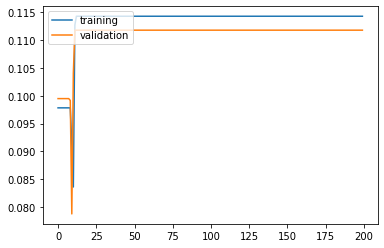

In [66]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.legend(['training', 'validation'], loc = 'upper left')
plt.show()

In [69]:
results = model.evaluate(X_test, y_test)

10000/10000 [==============================] - 0s 30us/step


In [70]:
print('Test accuracy: ', results[1])

Test accuracy:  0.1135


### 1.Weight Initialization

* Xavier
* Uniform distribution : sqrt( 6 / (fan_in + fan_out))
* Normal distribution : N(0, sqrt(2. / (fan_in + fan_out))) -fanin,fanout 입력층,출력층

* HE

* Uniform distribution : limit is sqrt( 6 / fan_in)
* Normal distribution : N(0, sqrt(2 / fan_in))


In [71]:
# from now on, create a function to generate (return) models
def mlp_model():
    model = Sequential()
    
    model.add(Dense(50, input_shape = (784, ), kernel_initializer='he_normal'))     # use he_normal initializer
    model.add(Activation('sigmoid'))    
    
    model.add(Dense(50, kernel_initializer='he_normal'))                            # use he_normal initializer
    model.add(Activation('sigmoid'))    
    
    model.add(Dense(50, kernel_initializer='he_normal'))                            # use he_normal initializer
    model.add(Activation('sigmoid'))    
    
    model.add(Dense(50, kernel_initializer='he_normal'))                            # use he_normal initializer
    model.add(Activation('sigmoid'))   
    
    model.add(Dense(10, kernel_initializer='he_normal'))                            # use he_normal initializer
    model.add(Activation('softmax'))
    
    sgd = optimizers.SGD(lr = 0.001)
    model.compile(optimizer = sgd, loss = 'categorical_crossentropy', metrics = ['accuracy'])
    
    return model

In [73]:
model = mlp_model()
history = model.fit(X_train, y_train, validation_split = 0.3, epochs = 100, verbose = 0)

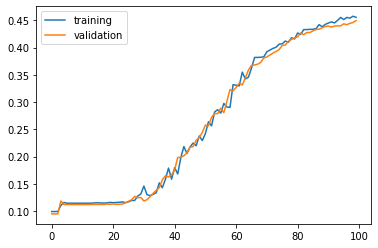

In [74]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.legend(['training', 'validation'], loc = 'upper left')
plt.show()

In [91]:
results = model.evaluate(X_test, y_test)

#loss값,인식률
print(results)

ValueError: Error when checking input: expected dense_31_input to have 2 dimensions, but got array with shape (10000, 28, 28)

In [76]:
print('Test accuracy: ', results[1])

Test accuracy:  0.4414


### 2.Nonlinearity(Activation function)

In [105]:
def mlp_model():
    model = Sequential()
    
    model.add(Dense(50, input_shape = (784, )))
    model.add(Activation('relu'))    # use relu
    model.add(Dense(50))
    model.add(Activation('relu'))    # use relu
    model.add(Dense(50))
    model.add(Activation('relu'))    # use relu
    model.add(Dense(50))
    model.add(Activation('relu'))    # use relu
    model.add(Dense(10))
    model.add(Activation('softmax'))
    
    sgd = optimizers.SGD(lr = 0.001)
    model.compile(optimizer = sgd, loss = 'categorical_crossentropy', metrics = ['accuracy'])
    
    return model

In [106]:
model = mlp_model()
history = model.fit(X_train, y_train, validation_split = 0.3, epochs = 100, verbose = 0)

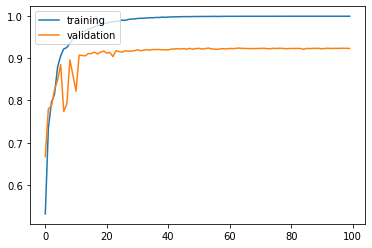

In [107]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.legend(['training', 'validation'], loc = 'upper left')
plt.show()

In [108]:
results = model.evaluate(X_test, y_test)
#loss값,인식률
print(results)

10000/10000 [==============================] - 0s 34us/step
[0.5032697614512326, 0.9278]


In [109]:
print('Test accuracy: ', results[1])

Test accuracy:  0.9278


### 3.Optimizers

In [110]:
def mlp_model():
    model = Sequential()
    
    model.add(Dense(50, input_shape = (784, )))
    model.add(Activation('sigmoid'))    
    model.add(Dense(50))
    model.add(Activation('sigmoid'))  
    model.add(Dense(50))
    model.add(Activation('sigmoid'))    
    model.add(Dense(50))
    model.add(Activation('sigmoid'))    
    model.add(Dense(10))
    model.add(Activation('softmax'))
    
    adam = optimizers.Adam(lr = 0.001)                     # use Adam optimizer
    model.compile(optimizer = adam, loss = 'categorical_crossentropy', metrics = ['accuracy'])
    
    return model

In [111]:
model = mlp_model()
history = model.fit(X_train, y_train, validation_split = 0.3, epochs = 100, verbose = 0)

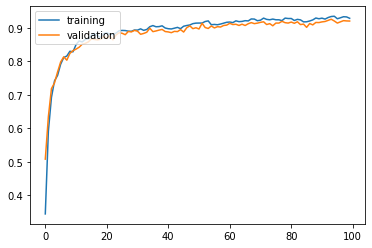

In [112]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.legend(['training', 'validation'], loc = 'upper left')
plt.show()

In [113]:
results = model.evaluate(X_test, y_test)

10000/10000 [==============================] - 0s 31us/step


In [114]:
print('Test accuracy: ', results[1])

Test accuracy:  0.9186


### 4.Batch Normalization


In [115]:
def mlp_model():
    model = Sequential()
    
    model.add(Dense(50, input_shape = (784, )))
    model.add(BatchNormalization())       
    model.add(Activation('sigmoid'))    
    
    model.add(Dense(50))
    model.add(BatchNormalization())       
    model.add(Activation('sigmoid'))   
    
    model.add(Dense(50))
    model.add(BatchNormalization())       
    model.add(Activation('sigmoid'))    
    
    model.add(Dense(50))
    model.add(BatchNormalization())       
    model.add(Activation('sigmoid'))  
    
    model.add(Dense(10))
    model.add(Activation('softmax'))
    
    sgd = optimizers.SGD(lr = 0.001)
    model.compile(optimizer = sgd, loss = 'categorical_crossentropy', metrics = ['accuracy'])
    
    return model

In [116]:
model = mlp_model()
history = model.fit(X_train, y_train, validation_split = 0.3, epochs = 100, verbose = 0)

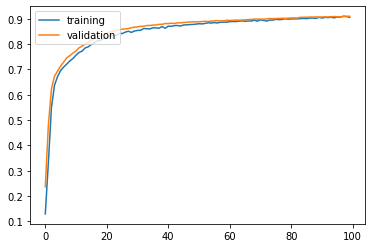

In [117]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.legend(['training', 'validation'], loc = 'upper left')
plt.show()

### 5.Dropout (Regularization)

In [146]:
def mlp_model():
    model = Sequential()
    
    model.add(Dense(50, input_shape = (784, )))
    model.add(Activation('sigmoid'))    
    model.add(Dropout(0.5))                        # Dropout layer after Activation
    
    model.add(Dense(50))
    model.add(Activation('sigmoid'))
    model.add(Dropout(0.5))                        # Dropout layer after Activation
    
    model.add(Dense(50))
    model.add(Activation('sigmoid'))    
    model.add(Dropout(0.5))                        # Dropout layer after Activation
    
    model.add(Dense(50))
    model.add(Activation('sigmoid'))    
    model.add(Dropout(0.5))                         # Dropout layer after Activation
    
    model.add(Dense(10))
    model.add(Activation('softmax'))
    
    sgd = optimizers.SGD(lr = 0.001)
    model.compile(optimizer = sgd, loss = 'categorical_crossentropy', metrics = ['accuracy'])
    
    return model

In [147]:
model = mlp_model()
history = model.fit(X_train, y_train, validation_split = 0.3, epochs = 100, verbose = 0)

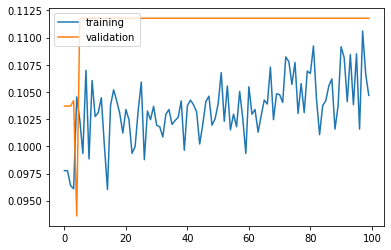

In [148]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.legend(['training', 'validation'], loc = 'upper left')
plt.show()

### 6.Model Ensemble

In [15]:
#레이블 data로 변환
y_train = np.argmax(y_train, axis = 1)
y_test = np.argmax(y_test, axis = 1)

In [16]:
print(y_train)

[6 9 2 ... 5 5 3]


In [17]:
def mlp_model():
    model = Sequential()
    
    model.add(Dense(50, input_shape = (784, )))
    model.add(Activation('sigmoid')) 
    
    model.add(Dense(50))
    model.add(Activation('sigmoid')) 
    
    model.add(Dense(50))
    model.add(Activation('sigmoid'))  
    
    model.add(Dense(50))
    model.add(Activation('sigmoid'))  
    
    model.add(Dense(10))
    model.add(Activation('softmax'))
    
    sgd = optimizers.SGD(lr = 0.001)
    model.compile(optimizer = sgd, loss = 'categorical_crossentropy', metrics = ['accuracy'])
    
    return model

In [18]:
model1 = KerasClassifier(build_fn = mlp_model, epochs = 100, verbose = 1)
model2 = KerasClassifier(build_fn = mlp_model, epochs = 100, verbose = 1)
model3 = KerasClassifier(build_fn = mlp_model, epochs = 100, verbose = 1)

In [19]:
ensemble_clf = VotingClassifier(estimators = [('model1', model1),
                                              ('model2', model2),
                                              ('model3', model3)], voting = 'soft')

In [20]:
ensemble_clf.fit(X_train, y_train)

Instructions for updating:
If using Keras pass *_constraint arguments to layers.

Epoch 1/100
19800/19800 [==============================] - 1s 38us/step - loss: 2.3655 - accuracy: 0.1008
Epoch 2/100
19800/19800 [==============================] - 1s 32us/step - loss: 2.3135 - accuracy: 0.1099
Epoch 3/100
19800/19800 [==============================] - 1s 32us/step - loss: 2.3025 - accuracy: 0.1135
Epoch 4/100
19800/19800 [==============================] - 1s 32us/step - loss: 2.3001 - accuracy: 0.1135
Epoch 5/100
19800/19800 [==============================] - 1s 32us/step - loss: 2.2994 - accuracy: 0.1135
Epoch 6/100
19800/19800 [==============================] - 1s 33us/step - loss: 2.2991 - accuracy: 0.1135
Epoch 7/100
19800/19800 [==============================] - 1s 32us/step - loss: 2.2988 - accuracy: 0.1135
Epoch 8/100
19800/19800 [==============================] - 1s 32us/step - loss: 2.2985 - accuracy: 0.1135
Epoch 9/100
19800/19800 [==============================] - 1s 33us/ste

19800/19800 [==============================] - 1s 32us/step - loss: 2.2673 - accuracy: 0.1137
Epoch 73/100
19800/19800 [==============================] - 1s 32us/step - loss: 2.2664 - accuracy: 0.1145
Epoch 74/100
19800/19800 [==============================] - 1s 32us/step - loss: 2.2653 - accuracy: 0.1138
Epoch 75/100
19800/19800 [==============================] - 1s 32us/step - loss: 2.2643 - accuracy: 0.1196
Epoch 76/100
19800/19800 [==============================] - 1s 32us/step - loss: 2.2632 - accuracy: 0.1185
Epoch 77/100
19800/19800 [==============================] - 1s 33us/step - loss: 2.2620 - accuracy: 0.1163
Epoch 78/100
19800/19800 [==============================] - 1s 32us/step - loss: 2.2609 - accuracy: 0.1225
Epoch 79/100
19800/19800 [==============================] - 1s 32us/step - loss: 2.2596 - accuracy: 0.1216
Epoch 80/100
19800/19800 [==============================] - 1s 32us/step - loss: 2.2583 - accuracy: 0.1281
Epoch 81/100
19800/19800 [========================

19800/19800 [==============================] - 1s 34us/step - loss: 2.2867 - accuracy: 0.1135
Epoch 49/100
19800/19800 [==============================] - 1s 34us/step - loss: 2.2863 - accuracy: 0.1135
Epoch 50/100
19800/19800 [==============================] - 1s 34us/step - loss: 2.2859 - accuracy: 0.1135
Epoch 51/100
19800/19800 [==============================] - 1s 34us/step - loss: 2.2855 - accuracy: 0.1135
Epoch 52/100
19800/19800 [==============================] - 1s 34us/step - loss: 2.2851 - accuracy: 0.1135
Epoch 53/100
19800/19800 [==============================] - 1s 34us/step - loss: 2.2847 - accuracy: 0.1135
Epoch 54/100
19800/19800 [==============================] - 1s 33us/step - loss: 2.2843 - accuracy: 0.1135
Epoch 55/100
19800/19800 [==============================] - 1s 34us/step - loss: 2.2838 - accuracy: 0.1135
Epoch 56/100
19800/19800 [==============================] - 1s 33us/step - loss: 2.2834 - accuracy: 0.1135
Epoch 57/100
19800/19800 [========================

19800/19800 [==============================] - 1s 34us/step - loss: 2.2943 - accuracy: 0.1135
Epoch 25/100
19800/19800 [==============================] - 1s 33us/step - loss: 2.2939 - accuracy: 0.1135
Epoch 26/100
19800/19800 [==============================] - 1s 34us/step - loss: 2.2936 - accuracy: 0.1135
Epoch 27/100
19800/19800 [==============================] - 1s 34us/step - loss: 2.2932 - accuracy: 0.1135
Epoch 28/100
19800/19800 [==============================] - 1s 33us/step - loss: 2.2929 - accuracy: 0.1135
Epoch 29/100
19800/19800 [==============================] - 1s 34us/step - loss: 2.2925 - accuracy: 0.1135
Epoch 30/100
19800/19800 [==============================] - 1s 33us/step - loss: 2.2922 - accuracy: 0.1135
Epoch 31/100
19800/19800 [==============================] - 1s 34us/step - loss: 2.2918 - accuracy: 0.1135
Epoch 32/100
19800/19800 [==============================] - 1s 33us/step - loss: 2.2914 - accuracy: 0.1135
Epoch 33/100
19800/19800 [========================

19800/19800 [==============================] - 1s 33us/step - loss: 2.1988 - accuracy: 0.2758


VotingClassifier(estimators=[('model1',
                              <keras.wrappers.scikit_learn.KerasClassifier object at 0x0000021085A6E4C8>),
                             ('model2',
                              <keras.wrappers.scikit_learn.KerasClassifier object at 0x0000021085A6E488>),
                             ('model3',
                              <keras.wrappers.scikit_learn.KerasClassifier object at 0x0000021085A6E508>)],
                 flatten_transform=True, n_jobs=None, voting='soft',
                 weights=None)

# Advanced MLP - 2
    - More training set
    - Weight Initialization scheme
    - Nonlinearity (Activation function)
    - Optimizers: adaptvie
    - Batch Normalization
    - Dropout (Regularization)
    - Model Ensemble

In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
# reshaping X data: (n, 28, 28) => (n, 784)
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1] * X_train.shape[2]))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1] * X_test.shape[2]))
# We use all training data and validate on all test data
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

NameError: name 'mnist' is not defined

In [18]:
def mlp_model():
    model = Sequential()
    
    model.add(Dense(50, input_shape = (784, ), kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(0.2))
    model.add(Dense(50, kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))    
    model.add(Dropout(0.2))
    model.add(Dense(50, kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(0.2))
    model.add(Dense(50, kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(0.2))
    model.add(Dense(10, kernel_initializer='he_normal'))
    model.add(Activation('softmax'))
    
    adam = optimizers.Adam(lr = 0.001)
    model.compile(optimizer = adam, loss = 'categorical_crossentropy', metrics = ['accuracy'])
    
    return model

In [19]:
# create 5 models to ensemble
from keras.callbacks import LambdaCallback
from keras.callbacks import EarlyStopping
from keras.layers import LeakyReLU


def lambdaf_(epoch, logs, step) : 
    if epoch % step == 0 : print(f"{epoch} => {logs}")                
        
def printepoch(step) :   
    return LambdaCallback(on_epoch_end=lambda epoch, logs: lambdaf_(epoch, logs, step)  )

model1 = KerasClassifier(build_fn = mlp_model, epochs = 3, callbacks=[])
model2 = KerasClassifier(build_fn = mlp_model, epochs = 3, callbacks=[])
model3 = KerasClassifier(build_fn = mlp_model, epochs = 3)
model4 = KerasClassifier(build_fn = mlp_model, epochs = 3)
model5 = KerasClassifier(build_fn = mlp_model, epochs = 3)



In [20]:
#ensemble_clf = VotingClassifier(estimators = [('model1', model1), ('model2', model2), ('model3', model3), ('model4', model4), ('model5', model5)], voting = 'soft')
ensemble_clf = VotingClassifier(estimators = [('model1', model1), ('model2', model2)], voting = 'soft')

In [26]:
ensemble_clf.fit(X_train, y_train)

ValueError: The estimator KerasClassifier should be a classifier.

In [ ]:
y_pred = ensemble_clf.predict(X_test)

In [ ]:
print('Acc: ', accuracy_score(y_pred, y_test))